# Stanford CME 241 (Winter 2024) - Assignment 4

**Due: Feb 5 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Please solve questions 1 and 2, and choose one of questions 3 or 4.**
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/neelsnarayan/cme241/blob/master/neel_mehdi_assignments/assignment4/Neel_Mehdi_Assignment4.ipynb

*Group members (replace below names with people in your group):* 
- Neel Narayan
- Mehdi Zhioua

## Imports

In [6]:
from rl.function_approx import FunctionApprox
from rl.markov_process import NonTerminal
from rl.distribution import Choose
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.policy import DeterministicPolicy
from rl.dynamic_programming import policy_iteration_result, value_iteration_result
from typing import TypeVar, Callable, Iterator, Tuple

## Question 1
Implement *Approximate Policy Iteration*, generalization of the tabular
Policy Iteration we covered in the previous class. In order to implement
Approximate Policy Iteration, first review the interface and
implementation of *Approximate Policy Evaluation* and *Approximate Value
Iteration* (in file
[rl/approximate_dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/approximate_dynamic_programming.py)),
then design the interface of *Approximate Policy Iteration* to be the
same as that of *Approximate Value Iteration*. Note that your
implementation of *Approximate Policy Iteration* would need to invoke
*Approximate Policy Evaluation* since Policy Evaluation is a component
of Policy Iteration. Test that your implementation is correct in two
ways:

-   Ensure that *Approximate Policy Iteration* gives the same Optimal
    Value Function/Optimal Policy as that obtained by *Approximate Value
    Iteration*.

-   Ensure that *Approximate Policy Iteration* produces the same result
    as our prior implementation of Policy Iteration (in file
    [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py)).
    For this you need to pass to your implementation of *Approximate
    Policy Iteration* a `FiniteMarkovDecisionProcess` input and a
    `Tabular` instance for the `FunctionApprox` input.

In [10]:
# We were not able to understand the interface and implementation of Approximate Policy Evaluation
# and Approximate Value Iteration, so the code below is our attempt at general structure
# It is a mix of pseudo code and python code

S = TypeVar('S')
A = TypeVar('A')

def approximate_policy_iteration(
    mdp: FiniteMarkovDecisionProcess[S, A],
    γ: float,
    approx1: FunctionApprox[NonTerminal[S]],
    tolerance: float
) -> Tuple[FunctionApprox[NonTerminal[S]], DeterministicPolicy[S, A]]:
    
    def improve(
        v: FunctionApprox[NonTerminal[S]]
    ) -> DeterministicPolicy[S, A]:
        # use greedy approach (from github)
        return v.update(
            [(
                s,
                max(mdp.mapping[s][a].expectation(return_)
                    for a in mdp.actions(s))
            ) for s in mdp.non_terminal_states]
        )
    
    def evaluate(
        policy: DeterministicPolicy[S, A],
        approx_0: FunctionApprox[NonTerminal[S]]
    ) -> FunctionApprox[NonTerminal[S]]:
        while True:
            # update the approximation until it begans to converge (pseudocode)
            new_approx_0 = approx_0.update(...)
            if math.abs(new_approx_0 - approx_0) <= tolerance:
                return new_approx_0
            approx_0 = new_approx_0
    
    # continually update policy by evaluating then improving
    while True:
        approx_0 = evaluate(policy, approx_0)
        improved = improve(approx_0)
        if policy == improved:
            return approx_0, policy
        policy = improved

## Question 2
Assume the Utility function is $U(x) = x - \frac {\alpha x^2} 2$.
Assuming $x \sim \mathcal{N}(\mu, \sigma^2)$, calculate:

-   Expected Utility $\mathbb{E}[U(x)]$

-   Certainty-Equivalent Value $x_{CE}$

-   Absolute Risk-Premium $\pi_A$


Assume you have a million dollars to invest for a year and you are
allowed to invest $z$ dollars in a risky asset whose annual return on
investment is $\mathcal{N}(\mu, \sigma^2)$ and the remaining (a million
minus $z$ dollars) would need to be invested in a riskless asset with
fixed annual return on investment of $r$. You are not allowed to adjust
the quantities invested in the risky and riskless assets after your
initial investment decision at time $t=0$ (static asset allocation
problem). If your risk-aversion is based on this Utility function, how
much would you invest in the risky asset? In other words, what is the
optimal value for $z$, given your level of risk-aversion (determined by
a fixed value of $\alpha$)?

Plot how the optimal value of $z$ varies with $\alpha$.

1. The expected utility is :
\begin{align*}
E(U) = E\left(x-\alpha \frac{x^2}{2}\right) &= \mu - \frac{\alpha}{2}E(x^2)\\
&=\mu - \frac{\alpha}{2}\left( \sigma^2 + \mu^2 \right)\\
\end{align*}

2. To compute the Certainty-Equivalent Value $x_{CE}$, we need to solve for:
$$
x_{CE} - \frac{\alpha x_{CE}^2}{2} = E(U)
$$
Which gives :
$$
x_{CE} = \frac{1 \pm \sqrt{1-2\alpha E(U)}}{\alpha}
$$
We see that this Utility function really makes sense only in the domain $]-\infty,1/\alpha]$, where it is increasing and concave (unless we think of an utility that wants to really target an objective wealth $1/\alpha$ and would penalize in a concave way deviating too much from it) so the intuitive $x_{CE}$ value we would take is $x_{CE} = \frac{1 - \sqrt{1-2\alpha E(U)}}{\alpha}$. We have to note that $x-\frac{\alpha x^2}{2}$ is maximized when $x=\frac{1}{\alpha}$, so the expected utility is bounded by $\frac{1}{2\alpha}$ and therefore the square root is always defined


3. If we visulaize it in terms of risk premia, then we would say $\pi_A = \vert x_{CE} - E(U)  \vert = \left\vert \frac{1 - \sqrt{1-2\alpha E(U)}}{\alpha} - E(U) \right\vert$. We could also say $\pi_A =  \left\vert \frac{1 + \sqrt{1-2\alpha E(U)}}{\alpha} - E(U) \right\vert$ but it would make more sense to take the first expression as we more naturally consider the domain where the utility function is increasing concave. 


So for a given $z$ (expressed in millions), the return on investment would be $(1-z)(1+r)+z(1+x)$ therfore, if we define $u(z) = E(U((1-z)(1+r)+z(1+x)))$, then we get :
$$
u(z) = E\left( X - \frac{\alpha X^2}{2}   \right)
$$
where 
$$
X \sim \mathcal{N}\left\{\underset{a}{\underbrace{1+r+z(\mu-r)}},z^2\sigma^2\right\}
$$

So :
$$
u(z) = 1+r +z(\mu-r)-\frac{\alpha}{2}\left[ z^2 \sigma^2 + (1+r)^2 + 2z(\mu-r)(1+r) + z^2(\mu-r)^2   \right]
$$

$$
u(z) = 1+r -\frac{\alpha}{2}(1+r)^2 + z \left\{ \mu - r + 2(\mu-r)(1+r)\right\} - z^2 \left\{ \frac{\alpha \sigma^2}{2} + \frac{\alpha (\mu-r)^2}{2}\right\}
$$

Which is simply a quadratic function of $z$ and minimized for 
$$
z = \frac{1}{\alpha} \left[\frac{\mu-r + 2(\mu-r)(1+r))}{\sigma^2 + (\mu-r)^2}\right]
$$

If we set for example the risk free rate $r=0.05$ and $\mu = 0.1$, and $\sigma = 0.5$ (50 \% volatility), then we get, depending on $\alpha \in [1,10]$:

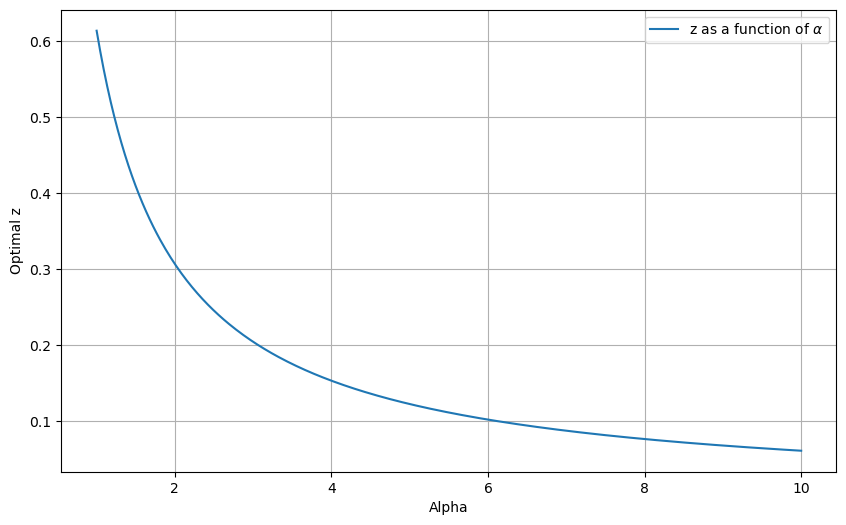

In [2]:
r = 0.05
mu = 0.1
sigma = 0.5

def z(alpha, r, mu, sigma):
    numerator = mu - r + 2 * (mu - r) * (1 + r)
    denominator = sigma**2 + (mu - r)**2
    return (1 / alpha) * (numerator / denominator)

alphas = np.linspace(1, 10, 400)

z_values = [z(alpha, r, mu, sigma) for alpha in alphas]

plt.figure(figsize=(10, 6))
plt.plot(alphas, z_values, label=r'z as a function of $\alpha$')
plt.xlabel('Alpha')
plt.ylabel('Optimal z')
plt.legend()
plt.grid(True)
plt.show()

## Question 3

Assume you are playing a casino game where at every turn, if you bet a
quantity $x$, you will be returned $x \cdot (1 + \alpha)$ with
probability $p$ and returned $x \cdot (1 - \beta)$ with probability
$q = 1 - p$ for $\alpha, \beta \in \mathbb{R}^+$ (i.e., the return on
bet is $\alpha$ with probability $p$ and $-\beta$ with probability
$q = 1-p$) . The problem is to identify a betting strategy that will
maximize one's expected wealth over the long run. The optimal solution
to this problem is known as the Kelly criterion, which involves betting
a constant fraction of one's wealth at each turn (let us denote this
optimal fraction as $f^*$).

It is known that the Kelly criterion (formula for $f^*$) is equivalent
to maximizing the Expected Utility of Wealth after a single bet, with
the Utility function defined as: $U(W) = \log(W)$. Denote your wealth
before placing the single bet as $W_0$. Let $f$ be the fraction (to be
solved for) of $W_0$ that you will bet. Therefore, your bet is
$f \cdot W_0$.

-   Write down the two outcomes for wealth $W$ at the end of your single
    bet of $f \cdot W_0$.

-   Write down the two outcomes for $\log$ (Utility) of $W$.

-   Write down $\mathbb{E}[\log(W)]$.

-   Take the derivative of $\mathbb{E}[\log(W)]$ with respect to $f$.

-   Set this derivative to 0 to solve for $f^*$. Verify that this is
    indeed a maxima by evaluating the second derivative at $f^*$. This
    formula for $f^*$ is known as the Kelly Criterion.

-   Convince yourself that this formula for $f^*$ makes intuitive sense
    (in terms of it's dependency on $\alpha$, $\beta$ and $p$).


1. After a single bet, the outcomes for the wealth are, in case of win $(1-f)W_0 + fW_0(1+\alpha) = W_0(1+f\alpha)$ and in case of loss : $W_0(1-f\beta)$

2. The log utilities are $\log(W_0)+\log(1+f\alpha)$ and $\log(W_0)+\log(1-f\beta)$

3. W there fore get $E(\log(W)) = \log(W_0) + p\log(1+f\alpha) + q \log(1-f\beta)$

4. Deriving with respect to $f$ gives 
$$
\frac{\partial E(\log(W)) }{\partial f} = \frac{p\alpha}{1+f\alpha} - \frac{q\beta}{1-f\beta}
$$

5. We get 
$$
\frac{1+f^*\alpha}{p\alpha} = \frac{1-f^*\beta}{q\beta}
$$

$$
f^*\left( \frac{1}{p} +\frac{1}{q} \right) = \frac{1}{q\beta} - \frac{1}{p \alpha}
$$

$$
f^* = \frac{pq}{p+q}\left( \frac{1}{q\beta} - \frac{1}{p \alpha} \right)
$$

$$
f^* = \frac{p}{\beta} - \frac{q}{\alpha}
$$

6. This formula makes intuitive sense because :
- It is increasing in p : the greater the probability of succes, the bigger hte bet
- It is decreasing in q : the greater the probilty of loss, the smaller the bet
- It is decreasing in $\beta$ : the bet is smaller if the loss risked is bigger
- It is increadsing in $\alpha$ : the bet is bigger is the upside is bigger

## Question 4

Derive the solution to Merton's Portfolio problem for the case of the
$\log(\cdot)$ Utility function. Note that the derivation in the textbook
is for CRRA Utility function with $\gamma \neq 1$ and the case of the
$\log(\cdot)$ Utility function was left as an exercise to the reader.